In [17]:
# need to install from kuaishou product base
from FixedEffectModel.api import *
from utils.panel_dgp import gen_data

N = 100
T = 10
beta = [-3,-1.5,1,2,3,4,5] 
alpha = 0.9
ate = 1 
exp_date = 2

#random remove N-1 obs to create unbalance case
data_df = gen_data(N, T, beta, ate, exp_date)



# Estimation
## DID
### 1. DID using self defined cross product

In [9]:

category_col = ['time'] # group variable, can be id or time
consist_col = ['x_1','treatment','post*treatment'] #independent variables
out_col = ['y'] # dependent variable

result0 = ols_high_d_category(data_df,
                             consist_col,
                             out_col,
                             category_col)
result0.summary()

demean time:     0.0098 s
time used to calculate degree of freedom of category variables:     0.0003 s
degree of freedom of category variables: 10
['x_1', 'treatment', 'post*treatment']
                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0331  
  No. Observations:         1000   Adj. R-squared(proj model):              0.0213  
  DoF of residual:         987.0   R-squared(full model):                   0.0595  
  Residual std err:       7.3724   Adj. R-squared(full model):              0.0471  
  Covariance Type:     nonrobust   F-statistic(proj model):                11.2609  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      2.874e-07  
                                   DoF of F-test (proj model):        [3.0, 987.0]  
                                   F-statistic(full model):                 4.8008  
                                   Prob (F-statis

### obtain fixedeffect

In [10]:
getfe(result0)

,dummy_name,effect,s.e,t-value,P>|t|
0,time1.0,-2.537932,0.872003,-2.910462,0.003690
1,time2.0,0.060358,0.774539,0.077927,0.937902
2,time3.0,-0.017641,0.774456,-0.022778,0.981832
3,time4.0,-0.037842,0.774141,-0.048883,0.961022
4,time5.0,1.804305,0.774146,2.330704,0.019970
5,time6.0,1.429572,0.774799,1.845086,0.065324
6,time7.0,1.862873,0.774150,2.406348,0.016296
7,time8.0,-0.479995,0.775413,-0.619018,0.536047
8,time9.0,-1.270961,0.774307,-1.641417,0.101029
9,time10.0,-0.812736,0.774762,-1.049014,0.294429


### 2. DID using treatment_input

You've updated default treatment input:  treatment_col
You've updated default treatment input:  exp_date
You've updated default treatment input:  effect


/Users/zhouxiaoyu/Desktop/FixedEffectModel/FixedEffectModel/GenCrossProd.py:54: UserWarning: You are doing DID with group effect
  warnings.warn('You are doing DID with group effect')


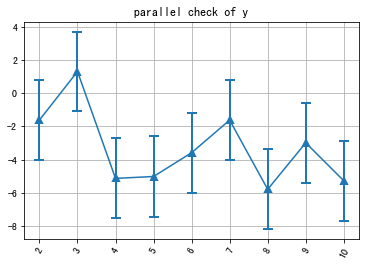

demean time:     0.0073 s
time used to calculate degree of freedom of category variables:     0.0457 s
degree of freedom of category variables: 109
['x_1', 'treatment*post_experiment', 'treatment']
                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0331  
  No. Observations:         1000   Adj. R-squared(proj model):             -0.0878  
  DoF of residual:         888.0   R-squared(full model):                   0.0595  
  Residual std err:       7.7730   Adj. R-squared(full model):             -0.0591  
  Covariance Type:     nonrobust   F-statistic(proj model):                10.1314  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      1.447e-06  
                                   DoF of F-test (proj model):        [3.0, 888.0]  
                                   F-statistic(full model):                 0.5013  
                                   Pr

In [11]:
category_col = ['id','time']
consist_col = ['x_1']
out_col = ['y']

result0 = ols_high_d_category(data_df,
                             consist_col,
                             out_col,
                             category_col,
                             treatment_input={'treatment_col':'treatment', 'exp_date': 2,'effect': 'group'})
result0.summary()

In [12]:
getfe(result0)

,dummy_name,effect,s.e,t-value,P>|t|
0,time1.0,-2.537932,0.919328,-2.760640,0.005888
1,time2.0,0.060358,0.816573,0.073916,0.941094
2,time3.0,-0.017641,0.816486,-0.021606,0.982767
3,time4.0,-0.037842,0.816154,-0.046367,0.963028
4,time5.0,1.804305,0.816159,2.210727,0.027309
5,time6.0,1.429572,0.816848,1.750107,0.080445
6,time7.0,1.862873,0.816163,2.282476,0.022697
7,time8.0,-0.479995,0.817495,-0.587153,0.557250
8,time9.0,-1.270961,0.816329,-1.556922,0.119845
9,time10.0,-0.812736,0.816809,-0.995014,0.320001


## IV

In [24]:
#iv
formula = 'y~x_1+x_2|id+time|0|(x_3|x_4~x_5+x_6)'
result = ols_high_d_category(data_df, formula = formula)
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1', 'x_2']
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']
endogenous variables: ['x_3', 'x_4']
instruments: ['x_5', 'x_6']
demean time:     0.0527 s
time used to calculate degree of freedom of category variables:     0.0032 s
degree of freedom of category variables: 109
['x_1', 'x_2']
                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):               -2.749e+05  
  No. Observations:         1000   Adj. R-squared(proj model):          -3.096e+05  
  DoF of residual:         887.0   R-squared(full model):               -2.416e+05  
  Residual std err:    3977.6992   Adj. R-squared(full model):          -2.724e+05  
  Covariance Type:     nonrobust   F-statistic(proj model):               679.9166  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):     2.255e-268  
                                  

In [25]:
ivtest(result)

Weak IV test with critical values based on 2SLS size
  Cragg-Donald Statistics:            0.000577  
  number of instrumental variables:          2  
  number of endogenous variables:            2  
                                      5%        10%        20%        30%    
-----------------------------------------------------------------------------
2SLS Size of nominal 5% Wald test     7.0300     4.5800     3.9500     3.6300
-----------------------------------------------------------------------------
H0: Instruments are weak

     Over identification test - nonrobust     
                    test statistics  p values 
----------------------------------------------
Sargan Statistics:                0          0
Basmann Statistics:               0          0
----------------------------------------------

             Tests of endogeneity            
                   test statistics  p values 
---------------------------------------------
Durbin Statistics:        974.8824       